# DSA5200 Module 02 Exercise: Preattentive Processing Visual Features

The first exercise will explore various preattentive processing features, mainly including colors and spatial grouping. To review those features, we will use example datasets, `R`, and relevant libraries. For the exercise, the following libraries are necessary: 

If you have not installed the libraries mentioned above, please install them using `install.packages()`. Before starting exercise activities, I would like to outline the rules to follow when completing assignments.

---

Rules of the module-based exercises as the course assignments

* **Rule 1**: You must display your outputs by executing your code or markdown cells to answer the exercise activities. Our course is on data visualization. <b><u>If you do not execute the code or write the sentences to answer the activities, I will not evaluate your submitted answer sheets, and you will receive zero credit.</u></b>

* **Rule 2**: The activities are **narrative in nature** to review the knowledge discussed in classes and the materials provided through Brightspace, including practice with Jupyter notebooks. Each activity will be connected to the others, so once you write some code lines in the previous activities, <b>you do not need to write those repeatedly in the following activities unless the activity requests to do so.</b> For example, suppose Activity 1 requests to read the dataset:

    ```R
        
        # Load a dataset
        data <- read_csv("../datasets/data1.csv")
    
    ```
    <br>
    
    You do not need to write or load the dataset again in Activity 2, because it is already loaded in your local or cloud computing memory.

    ```R
    
        # Activity 2: Display the first five records of the dataset. 
        # Do not reload the dataset (don't do Activity 1, once again); 
        # instead, write code or answer the question that Activity 2 requested.
        data |> head(5)
        
    ```
    <br>
    
    Suppose I see these repeated codes in your assignment during the evaluation of your answered notebook. In that case, **I will deduct 3 percent of a full credit for each activity (question)** unless the activity requests.

* **Rule 3**: In this course, which focuses on visualization, I will evaluate only **the visualization output, not the code**, when an activity requires data visualization. However, if an activity involves questions about **non-visualized outputs**—such as displaying tables or finding specific values—then the code you write will be critical. This guideline means that **copying and pasting identical code**, which is a form of academic dishonesty, **will be scrutinized only for activities that require non-visualized outputs.** For activities that involve visualized output, using identical code will be acceptable, as differences in coding can lead to the same efficient approach for data visualization.

* **Rule 4 (Second Chance -- Re-evaluation Process)**: All students, except those penalized, **have one additional opportunity to request an evaluation of their revised answers after resubmission. In this second chance, you can resubmit any assignments that students need to improve their scores. However, once you spend this chance, you cannot ask for a re-evaluation.** Therefore, it is better to wait until all assignments are dispatched and evaluated before taking advantage of this opportunity, such as in the final week.

* **Rule 5 (Penalty)**: If the instructor identifies **any incidents of academic dishonesty** during the evaluation—such as copying and pasting identical code or text, or the minimal use of generative AIs without proper citations and references—**then all students involved will receive a penalty score of 5**. This penalty will be applied **regardless of who copied the material, unless the original student can provide explicit evidence of their originality**. Acceptable forms of evidence include emails, messages, chats with exact timestamps, and attached original files. **Additionally, students who receive this penalty will forfeit their second chance as outlined in Rule 4 for the affected assignment**.

---



## Activity 1 (2 points)

Students discussed three types of color palettes, which are collections of colors. Please (1) create a sequential color palette consisting of **100** different colors using predefined finite colors with the `paletteer` library, and (2) display it as a colormap (or a single colorbar). Note that for Activity 1, you need to ensure that the number of colors selected is less than 100 (i.e., $n < 100$) to create a sequential color palette with 100 distinct colors; otherwise, continuous palettes cannot be used. Also, a colorbar must be a bar shape, not any other shape, such as a square or a large, thick rectangle. Check how a majority colormap shape looks like from image search. If you need guidance on how to use the `paletteer` library, you can refer to the `paletteer` documentation in a code cell of this notebook or check [The R Graph Gallery](https://r-graph-gallery.com/package/paletteer.html). (**Hint**: _think about how to increase the number of distinct colors from a small finite colors._)

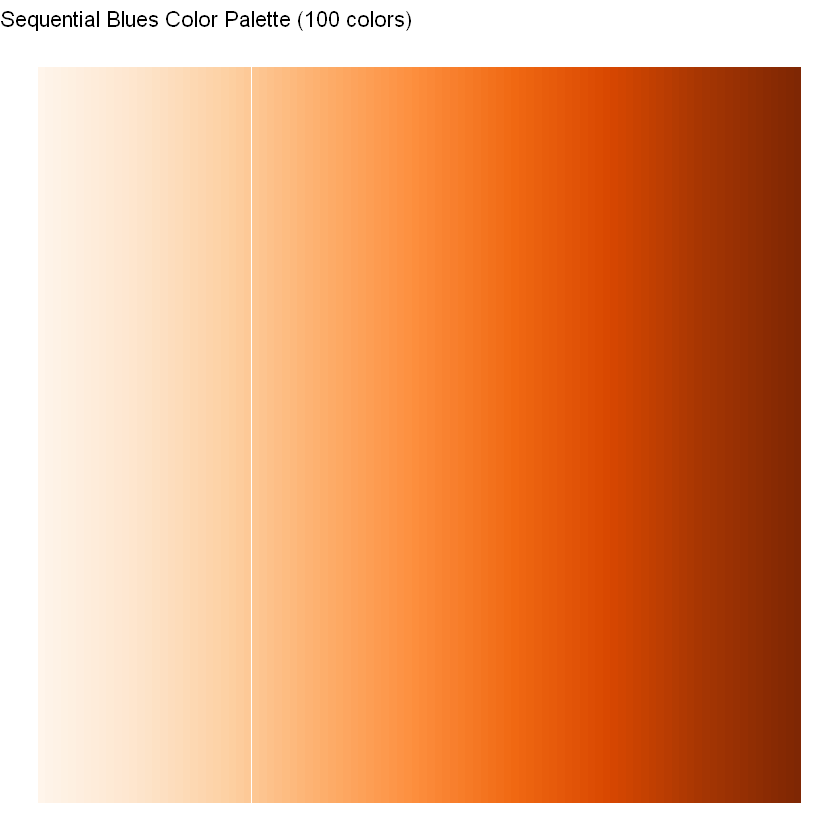

In [2]:

library(tidyverse)
library(paletteer)

base_colors <- paletteer_d("RColorBrewer::Oranges", n = 9) 

seq_colors <- colorRampPalette(base_colors)(100) 

df <- data.frame(x = 1:100, y = 1, col = seq_colors)

library(ggplot2)

ggplot(df, aes(x = x, y = y, fill = col)) +
  geom_tile() +
  scale_fill_identity() +
  theme_void() +
  theme(legend.position = "none") +
  ggtitle("Sequential Blues Color Palette (100 colors)")

## Activity 2 (2 points)

Let's keep using the sequential color palette created in Activity 1. Please describe whether your color palette is color blind friendly. Display a colormap adjusted by the technique we discussed to create a colorblind-friendly palette from your original palette. **Remember, you must describe your thoughts and display a colormap whether your color palette is colorblind-friendly**.

Warning message:
"package 'dichromat' is in use and will not be installed"
Warning message:
"package 'pals' is in use and will not be installed"


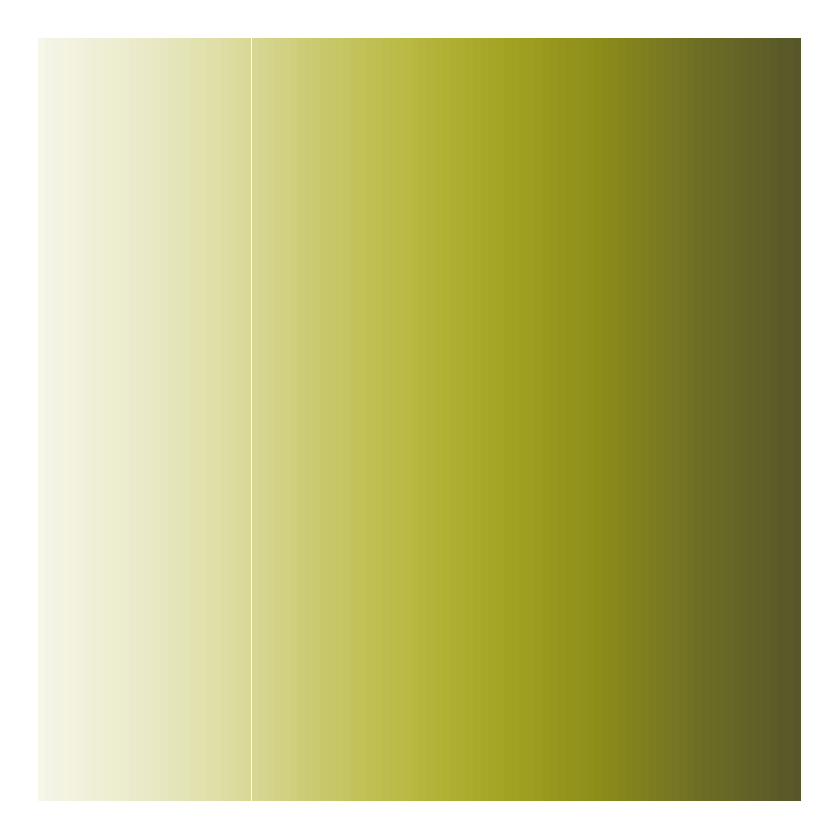

In [5]:
install.packages('dichromat')
install.packages('pals')
library(dichromat)
library(pals)

# Activity 1. Please describe whether your color palette is color blind friendly.
color_blind_seq_colors <- dichromat(seq_colors)

# display colormap
df_color_blind <- data.frame(x = 1:100, y = 1, col = color_blind_seq_colors)

ggplot(df_color_blind, aes(x, y, fill = col)) +
  geom_tile() +
  scale_fill_identity() +
  theme_void()

**Use this markdown cell to describe your explanation whether your color palette is colorblind friendly, created in Activity 1**

_Your answer goes here_
The Oranges palette I used is not completely colorblind friendly. People with color vision problems, especially red-green colorblindness, may find it hard to see differences between some shades of orange. They can still notice the very light and very dark shades because of brightness, but the middle shades might look too similar. So, this palette is fine for showing a smooth gradient, but it is not the best choice if I want my chart to be clear and easy for everyone to read.


 - The sequential palette from Activity 1 lacked full colorblind accessibility.
 - When tested with dichromat simulation, some neighboring colors became difficult to tell apart.
 - After making colorblind-safe adjustments, the updated palette offers improved contrast and is more accessible for users with visual impairments.

---

Before doing Activity 4, let us read our sample data. 

In [14]:
brca <- read.csv('./brca_metabric_clinical_gene_expression_data_zscore.csv')

In [15]:
brca %>% str()

'data.frame':	1980 obs. of  8 variables:
 $ Patient.ID               : chr  "MB-0000" "MB-0002" "MB-0005" "MB-0006" ...
 $ Age.at.Diagnosis         : num  75.7 43.2 48.9 47.7 77 ...
 $ ER.Status                : chr  "Positive" "Positive" "Positive" "Positive" ...
 $ Sex                      : chr  "Female" "Female" "Female" "Female" ...
 $ ESR1                     : num  -0.302 0.219 0.217 0.386 0.792 ...
 $ GATA3                    : num  -1.685 1.169 -0.127 -0.538 0.157 ...
 $ Overall.Survival..Months.: num  140.5 84.6 163.7 164.9 41.4 ...
 $ Hormone.Therapy          : chr  "YES" "YES" "YES" "YES" ...


<p>
    Various medical researchers contribute their datasets for cancer genomics to platforms like <a href='https://www.cbioportal.org/study/summary?id=brca_metabric'>cBioPortal</a>. For example, the METABRIC Breast Cancer dataset includes clinical attributes and gene expression values from patients (<a href='https://pubmed.ncbi.nlm.nih.gov/22522925/'>Curtis et al. 2012</a>; <a href='https://pubmed.ncbi.nlm.nih.gov/27161491/'>Pereira et al. 2016</a>).
</p>

<h3>Understanding Gene Expression</h3>
<p>
Gene expression is a fundamental process where the information encoded in a gene is used to produce proteins or non-coding RNA, which are crucial for the functioning and maintaining our body cells. Since cells have a finite lifespan, they need to be regenerated regularly, and gene expression is the key mechanism driving this regeneration.
<br><br>
Researchers often use microarray technology to measure gene expression. This technology allows them to assess the expression levels of thousands of genes simultaneously. These levels are typically transformed into log2 values, making it easier to analyze the data and compare across different studies, such as those investigating breast cancer.    
</p>

<h3>The Role of ESR1 and GATA3 in Breast Cancer</h3>
<p>
    In breast cancer, understanding the expression of specific genes like ESR1 and GATA3 is crucial for determining the most appropriate therapy. Breast cancers are broadly categorized based on their estrogen receptor (ER) status: ER-positive and ER-negative tumors.

ER-positive tumors contain estrogen receptors, which means they are likely to respond to hormone therapies and generally have a better prognosis compared to ER-negative tumors.
ER-negative tumors, on the other hand, do not express estrogen receptors and are typically less responsive to hormone therapy.
ESR1 encodes for Estrogen Receptor Alpha (ERα), which is activated by the hormone estrogen. When breast cancer is found to have high levels of ESR1 expression, it is classified as ERα-positive, indicating that the cancer may respond well to hormone therapy.

GATA3 is another critical gene in the context of ERα-positive breast cancer. It acts as a transcription factor that collaborates with ERα to regulate the expression of many other genes involved in breast cancer. GATA3 expression levels can influence the behavior of the cancer; low levels of GATA3 expression are associated with more aggressive cancers that are less responsive to hormone therapies.
</p>

## Activity 4 (2 points)

1. Create a pair plot, a grid plot that enables the visualization of the relationship between each pair of **Age.at.Diagnosis**, **ESR1**, and **GTAT3** for each category of **ER.Status**.   (Hint: _you have to change the data type of **ER.Status**._)

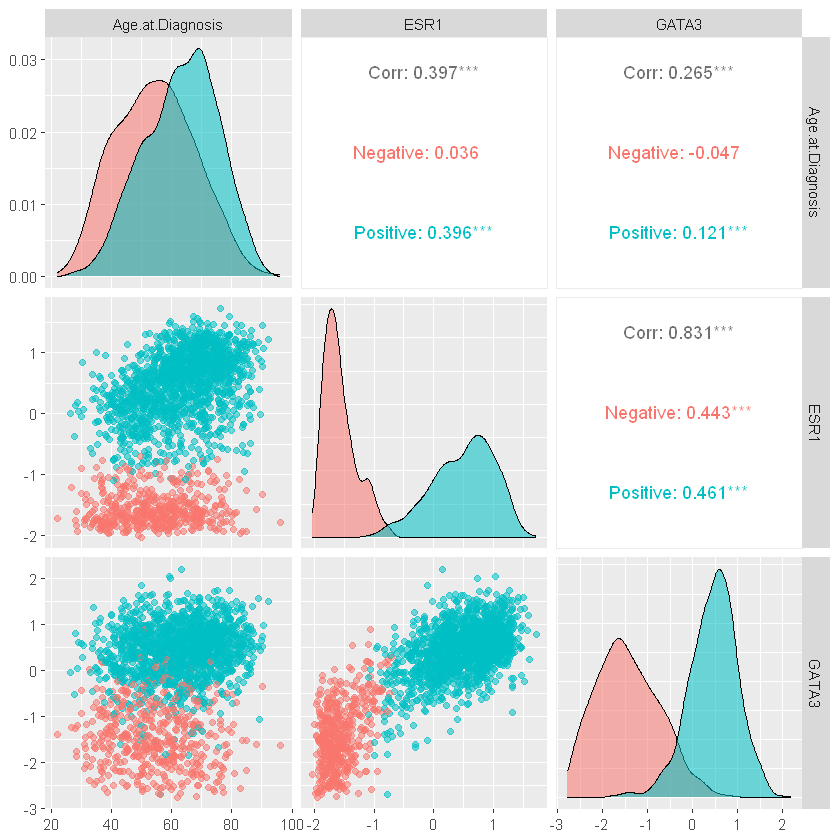

In [16]:

library(GGally)

# Convert ER.Status to factor 
brca$ER.Status <- as.factor(brca$ER.Status)

# Pair plot
ggpairs(brca,
        columns = c("Age.at.Diagnosis", "ESR1", "GATA3"),
        aes(color = ER.Status, alpha = 0.7))


2. Suppose you need to create the pair plot between each pair of **Age.at.Diagnosis**, **ESR1**, and **GTAT3** for **Overall.Survival..Months.**. 

   **What kind of problem will happen? Use this markdown cell to describe your explanation.**

    _Your answer goes here_
If we create a pair plot of Age at Diagnosis, ESR1, and GATA3 using Overall Survival Months for coloring, a problem arises because this variable is numeric and has many unique values. This would assign a different color to each value, making the plot cluttered and difficult to interpret. To address this, we could either convert survival months into categories such as low, medium, and high, or use it solely as a variable in the scatterplots without mapping it to color.

If we try to create the pair plot using Overall.Survival..Months. as the grouping variable
 - problem arises because this variable is continuous, not categorical. 
 - Unlike ER.Status, which has clear categories (e.g., Positive vs Negative), survival months can take many different values.
 -  As a result, the pair plot would display points with a continuous gradient  of colors, making the scatterplots cluttered and difficult to interpret. 
 - The plot would not show distinct groups but rather a smooth color scale, which does not serve the intended purpose of categorical comparison in a pair plot.



3. Let's keep thinking the second situation (the pair plot between each pair of **Age.at.Diagnosis**, **ESRI1**, and **GTAT3** for **Overall.Survival..Monthns.**)
  
    **Why does this problem happen? Use this markdown cell to describe your explanation.**

   _Your answer goes here_
If we create a pair plot of Age at Diagnosis, ESR1, and GATA3 using Overall Survival Months for color, it can cause a problem because this variable is numeric and has many different values. This would give each point a different color, making the plot messy and hard to read. To fix this, we can either group survival months into categories like low, medium, and high, or use it only as a variable in the scatterplots without coloring.

This problem happens because 
 - Overall.Survival..Months. is a continuous variable. 
Pair plots are most effective when the grouping variable is categorical, since each 
category can be clearly represented with a distinct color.
 - When we map a continuous numeric variable like survival months to the color aesthetic, the plotting function uses a continuous gradient scale.
 - This means almost every point gets a unique shade, causing overlapping colors and visual clutter.
 - As a result, the pair plot becomes hard to interpret, since it no longer shows distinct group differences but rather a blurred gradient of values.



## Activity 5 (2 points)

In Activity 4, we can confirm that the scatter points between **GATA3** and **ESRI1** can easily be separated into two clusters based on the **ER .Status**. (1) <u>Please replicate the following chart with `ggplot2` and `ggthemes` as similar as possible</u>:

<img src="./activity06_img.png" style="width: 40%;"/>

and, (2) <u>Answer the question and fill in the appropriate title in your replicated chart title and subtitle.</u> Check the request in the title and the questions in the subtitle in the above scatterplot.

In [ ]:
Replicate the chart with ggplot2 and ggthemes.

Warning message:
"package 'ggthemes' is in use and will not be installed"


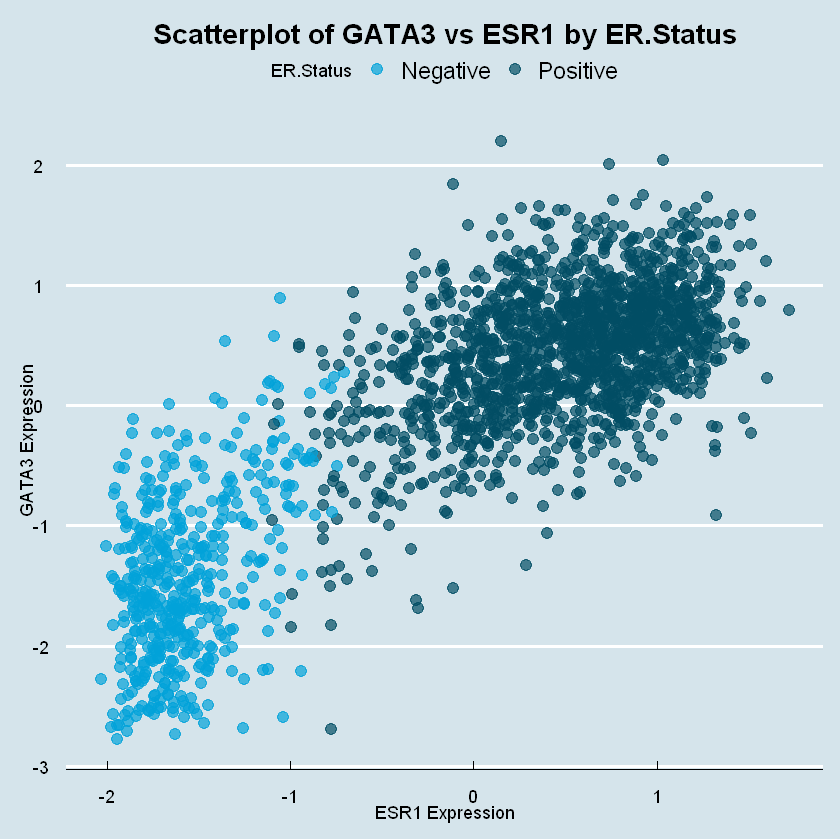

In [18]:
install.packages('ggthemes')
library(ggthemes)

ggplot(brca, aes(x = ESR1, y = GATA3, color = ER.Status)) +
  geom_point(size = 3, alpha = 0.7) +
  theme_economist() +
  scale_color_economist() +
  labs(title = "Scatterplot of GATA3 vs ESR1 by ER.Status",
       x = "ESR1 Expression",
       y = "GATA3 Expression") +
  theme(plot.title = element_text(hjust = 0.5))


#### Which ER status group survives longer than the others?
- When comparing survival time by ER status, patients with `ER-Positive` tumors generally `survive longer` than those with ER-Negative tumors. 
- This can be seen from the higher median and mean survival months in the ER-Positive group. 
- ER-Positive breast cancers are often more responsive to hormone therapy, which improves survival outcomes.


#### How about the relationship between diagnosed age and overall survival?
 - The scatterplot shows that age at diagnosis and overall survival are `negatively` associated: `younger patients` tend to `live longer` after diagnosis, while `older patients` usually have `shorter survival times`. 
 - This problem happens because age is a continuous risk factor that influences survival — older patients are more likely to have comorbidities and less favorable treatment responses, leading to reduced survival compared to younger patients.


In [ ]:
Patients with ER-Positive breast cancer usually survive longer than those with ER-Negative breast cancer.
This is because ER-Positive tumors often respond well to hormone therapy, which helps slow down the cancer and improve outcomes.
Studies show that both the median and average survival times are higher for ER-Positive patients compared to ER-Negative patients.

In [ ]:
When looking at the relationship between age at diagnosis and overall survival, we can see a negative pattern
younger patients tend to live longer after diagnosis, while older patients often have shorter survival times.
This happens because age itself is an important risk factor.
Older patients are more likely to have other health problems and may not respond as effectively to treatment, 
which reduces their overall survival compared to younger patients.